In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

/home/goncalo/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../../../datasets/parte1/weatherAUS.csv')

#### Split Data

###### As seen in the EDA section, rainfall in Australia exhibits seasonality. Instead of using the full date from the Date column, extracting just the month is much more valuable.

In [3]:


df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)
#df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
#df['Day'] = df['Date'].dt.day
df.drop(['Date'], inplace=True, axis=1)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12


In [4]:
df['Year'].unique()

KeyError: 'Year'

### Drop columns which do not improve the model

In [ ]:
#df.drop(['Location'], axis=1, inplace=True)

# Missing Values


#### Mean imputation in NA values

In [ ]:
#df.drop(['Evaporation'], axis=1, inplace=True)
#df.drop(['Sunshine'], axis=1, inplace=True)
#df.drop(['Cloud9am'], axis=1, inplace=True)
#df.drop(['Cloud3pm'], axis=1, inplace=True)

In [ ]:
# Numeric features
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)

df['MaxTemp'].fillna(df['MaxTemp'].mean() , inplace=True)

df['Rainfall'].fillna(df['Rainfall'].mean() , inplace=True)

df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean() , inplace=True)

df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean() , inplace=True)

df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean() , inplace=True)

df['Humidity9am'].fillna(df['Humidity9am'].mean() , inplace=True)

df['Humidity3pm'].fillna(df['Humidity3pm'].mean() , inplace=True)

df['Pressure9am'].fillna(df['Pressure9am'].mean() , inplace=True)

df['Pressure3pm'].fillna(df['Pressure3pm'].mean() , inplace=True)

df['Temp9am'].fillna(df['Temp9am'].mean() , inplace=True)

df['Temp3pm'].fillna(df['Temp3pm'].mean() , inplace=True)

df['Evaporation'].fillna(df['Evaporation'].mean() , inplace=True)

df['Sunshine'].fillna(df['Sunshine'].mean() , inplace=True)

df['Cloud9am'].fillna(df['Cloud9am'].mean() , inplace=True)

df['Cloud3pm'].fillna(df['Cloud3pm'].mean(), inplace=True)

# Categorical features
# FAZEMOS ISTO PORQUE AS FEATURES CATEGORIAS ESTAO BEM DISTRIBUIDAS E PORTANTO A MODA NAO REPRESENTA UMA GRANDE PARTE DOS DADOS
categorical_features = [col for col in df.columns if df[col].dtype == object]
categorical_features.remove('RainTomorrow')
categorical_features.remove('RainToday')
categorical_features.remove('Location')

for col in categorical_features:
    values = df['WindDir3pm'].value_counts().index.values
    probs = df[col].value_counts(normalize=True).values
    df[col].replace(np.nan, np.random.choice(a=values, p=probs), inplace=True)


 

In [ ]:
df.dropna(inplace=True)

print(df.isna().sum())

df.shape

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
dtype: int64


(140787, 24)

## Handling Outliers

## Label encoding

In [ ]:
label_encoder = LabelEncoder()

df['Location'] = label_encoder.fit_transform(df['Location'])
df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12


In [ ]:
df.to_csv('../../../datasets/parte1/dataset_cleaned.csv', index=False)

<Axes: >

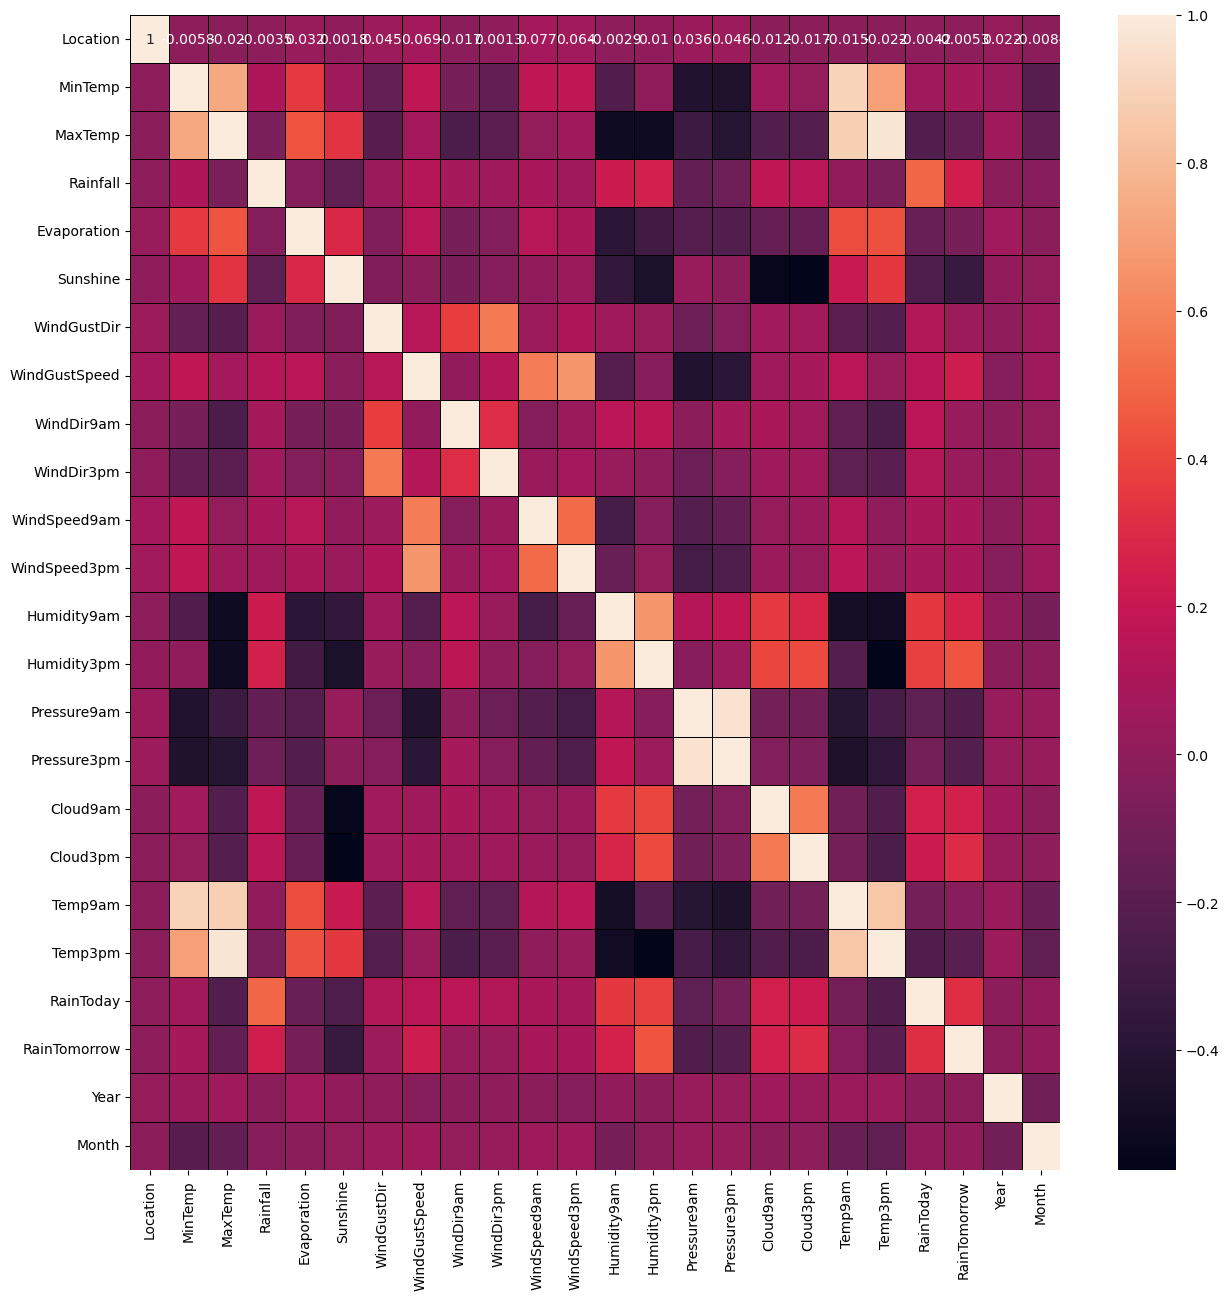

In [ ]:
fig = plt.figure(figsize=(15, 15))
satisfaction_corr = df.corr(method='pearson', numeric_only=True)
sns.heatmap(satisfaction_corr, linecolor='black', linewidths=0.5, annot=True)

<Axes: >

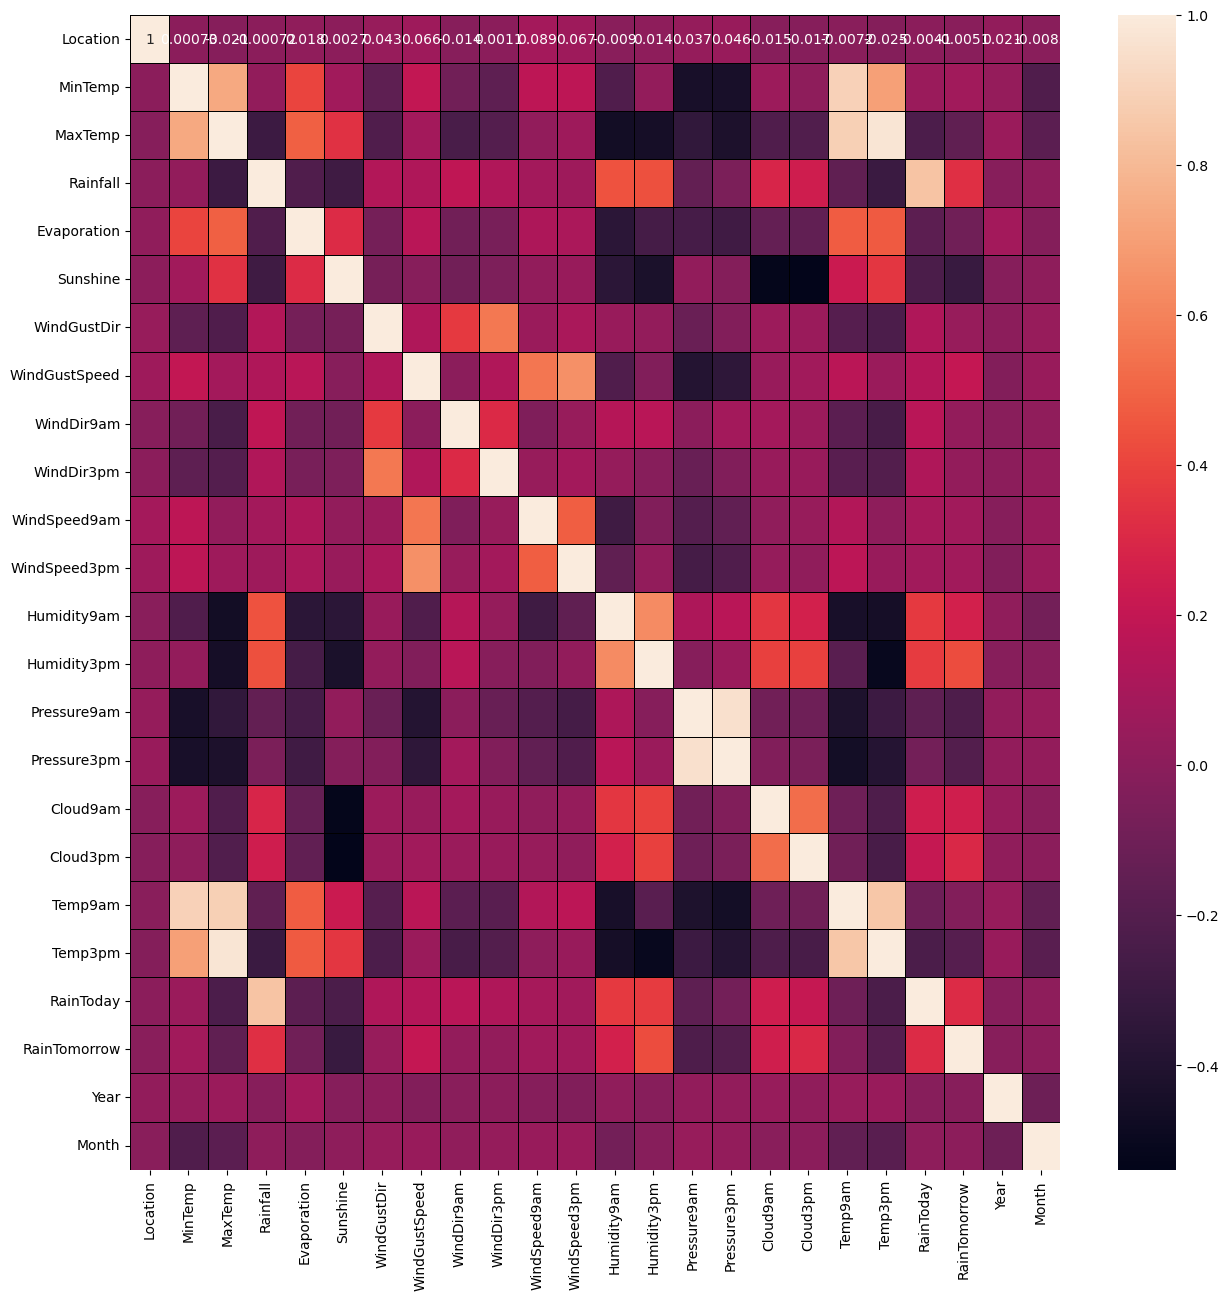

In [ ]:
fig = plt.figure(figsize=(15, 15))
satisfaction_corr = df.corr(method='spearman', numeric_only=True)
sns.heatmap(satisfaction_corr, linecolor='black', linewidths=0.5, annot=True)